In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# Problem statement:

#1. if as a marketing manager i have a budget of 1000 to be spent on 
# three different sources of making adv,
# how i am going to distribute the budget?

#2. what would be the sales value if i change the TV spent by 50 units, 
# Radio sales by 30 unit and newspapaer sales
# by 40 units

#3. among the three sources which source is the most effective source of 
# advertisment, best ROI

In [6]:
# Exploratory Data Analysis
# Univariate analysis
    # histograms, boxplots, density plot, distplot
# Bivariate analysis
    # Numeric-Numeric
        # scatterplot, correlation plot
    # Numeric-Categorical
        # barplot, stackplot, boxplot
    # Categorical-Categorical
        # tileplot, cross tabulation
# Multivariate analysis
    # all columns together
        # scatter matrix

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


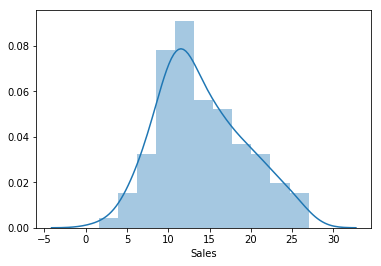

In [8]:
import seaborn as sns
sns.distplot(df.Sales)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


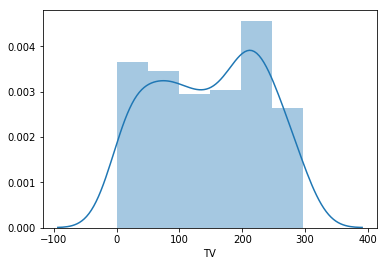

In [9]:
sns.distplot(df.TV)

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


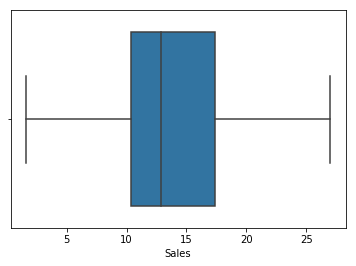

In [10]:
sns.boxplot(df.Sales)

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


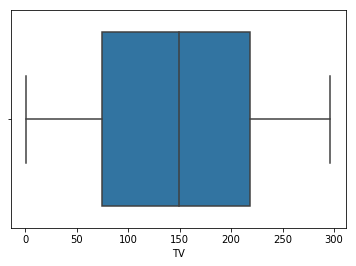

In [11]:
sns.boxplot(df.TV)

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


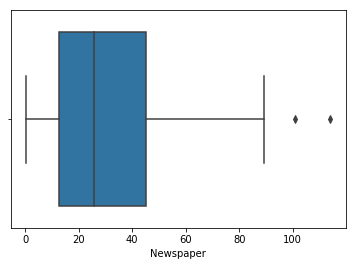

In [12]:
sns.boxplot(df.Newspaper)

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


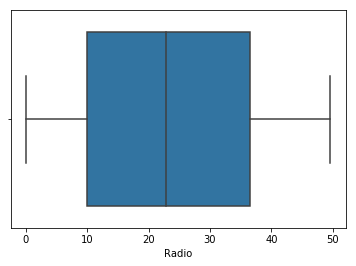

In [13]:
sns.boxplot(df.Radio)

In [16]:
np.round(df.skew(),0)

TV          -0.0
Radio        0.0
Newspaper    1.0
Sales        0.0
dtype: float64

In [63]:
# Sales = func(tv spent, radio spent and newspapaer spent)

In [64]:
# sales dv and all others are predictors

In [65]:
# EDA

Text(0,0.5,'Sales')

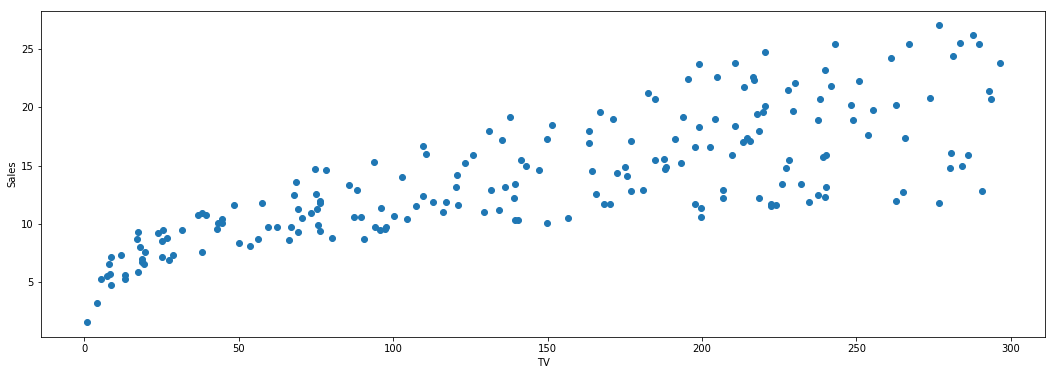

In [6]:
plt.figure(figsize=(18,6))
plt.plot(df['TV'],df['Sales'],'o')
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0,0.5,'Sales')

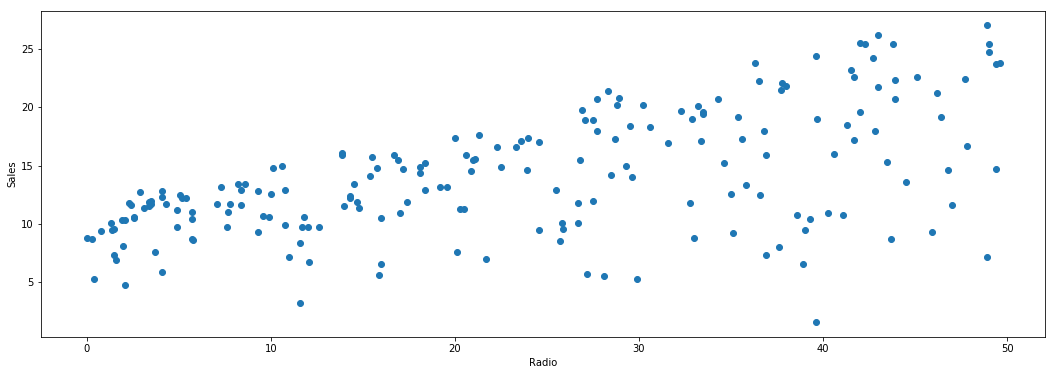

In [7]:
plt.figure(figsize=(18,6))
plt.plot(df['Radio'],df['Sales'],'o')
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0,0.5,'Sales')

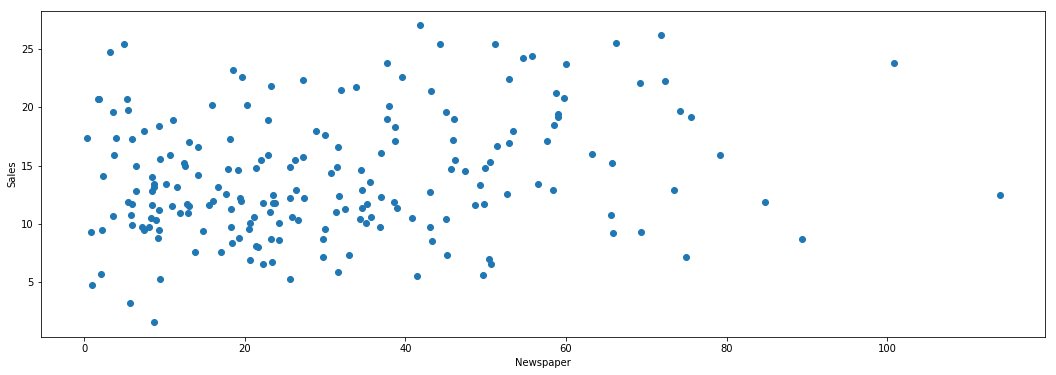

In [8]:
plt.figure(figsize=(18,6))
plt.plot(df['Newspaper'],df['Sales'],'o')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

In [10]:
# Linear Regression Technique is a Supervised Learning Algorithm

In [11]:
# One X and one Y variable :: simple linear regression model
# More than one X and one Y variable :: multiple linear regression model

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
# the linear regression model used the concept of gradient descent 
# algorithm to minimize the cost function

In [17]:
# cost = MSE (mean square error)
def computeCost(X,y, theta):
    inner = np.power(((X * theta.T) - y),2)
    return np.sum(inner) / (2*len(X))

In [15]:
# let's add a column of ones, so that we can vectorize the solution to compute the cost and the gradients

In [18]:
data = df[['TV','Sales']]

In [19]:
data.head(3)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3


In [20]:
data.insert(0,'Ones',1)

In [21]:
data.head(3)

,Ones,TV,Sales
0,1,230.1,22.1
1,1,44.5,10.4
2,1,17.2,9.3


In [22]:
data.shape

(200, 3)

In [23]:
cols = data.shape[1]

In [24]:
cols

3

In [25]:
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [26]:
X.head(3)

,Ones,TV
0,1,230.1
1,1,44.5
2,1,17.2


In [27]:
y.head(3)

,Sales
0,22.1
1,10.4
2,9.3


In [28]:
X = np.matrix(X.values) #predictor
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [29]:
theta

matrix([[0, 0]])

In [30]:
X.shape, theta.shape, y.shape

((200, 2), (1, 2), (200, 1))

In [31]:
computeCost(X,y,theta) #the cost of the initial solution (MSE), error function, loss function, cost function

111.858125

In [89]:
# we need to perform gradient descent search to find out best parameters theta value that minimize the cost

In [32]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [33]:
alpha = 0.001 # hyperparamter
iters = 100   # hyperparamter

In [34]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [35]:
np.round(g,3)

array([[-1.87981953e+141, -3.70170604e+143]])

In [36]:
cost[-1]

1.983940789577193e+291

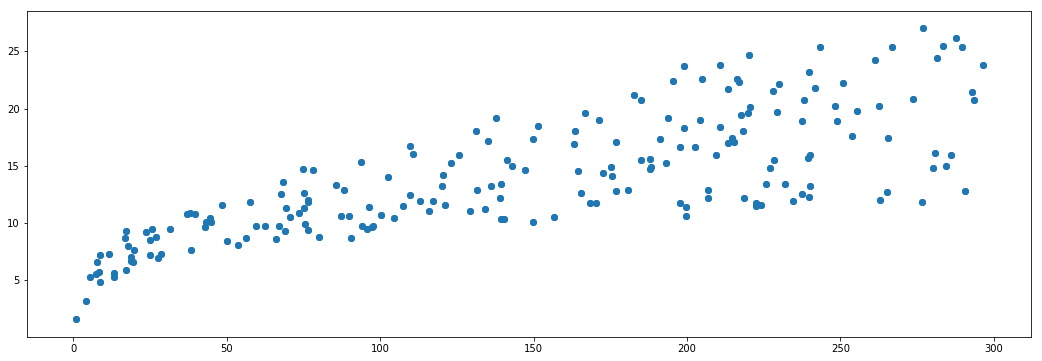

In [37]:
x = np.linspace(data.TV.min(), data.Sales.max(),100)
f = g[0,0] + (g[0,1] *x)

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(data.TV,data.Sales,'o',label='Predicted')
ax.scatter(data.TV, data.Sales)


In [38]:
from sklearn import linear_model

In [39]:
fit1 = linear_model.LinearRegression()

In [40]:
fit1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
fit1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
fit1.score(X,y)

0.611875050850071

In [43]:
fit1.coef_

array([[0.        , 0.04753664]])

In [44]:
pred = fit1.predict(X)
y.shape

(200, 1)

In [45]:
np.mean(np.square(y-pred))

10.512652915656757

In [47]:
X = np.matrix(df[['TV','Radio','Newspaper']])
y = np.matrix(df.Sales)

In [48]:
model1 = linear_model.LinearRegression()

In [49]:
X.shape, y.shape

((200, 3), (1, 200))

In [50]:
model1.fit(X,y.T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
model1.score(X,y.T) # R-square

0.8972106381789521

In [52]:
model1.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [53]:
model1.intercept_

array([2.93888937])

In [198]:
# Problem statement:

#1. if as a marketing manager i have a budget of 100 to be spent on three different sources of making adv,
# how i am going to distribute the budget?

#answer:
#1. Radio: 
#2. TV:
#3. Newspaper:

# cost information, insufficient

#2. what would be the sales value if i change the TV spent by 50 units, Radio sales by 30 unit and newspapaer sales
# by 40 units

#answer:
# sales = 2.94 + 0.045 * TV + 0.188 * Radio - 0.001*Newspaper
2.94 + (0.045 * 50) + (0.188 * 30) - (0.001*40)

#predicted sales = 10.79

#3. among the three sources which source is the most effective source of advertisment, best ROI

#answer:
# beta coefficient of Radio is relatively higher this yeilds better ROI

10.79